In [1]:
import bartide
bartide.__version__

'0.2.0'

In [2]:
for r1,r2 in bartide.glob_files('test_data', read1_pattern = "R1", read2_pattern = "R2", file_extension = "fastq.gz"):
    print (r1, r2)
    extractor = bartide.BarcodeExtractor(r1, r2, disable_progress_bar=True)
    extractor.identify_flanks()
    extractor.count_barcodes()
    corrector = bartide.SeqCorrect(disable_progress_bar=True)
    corrector.run(extractor.rawCounts)
    save_name = r1.replace('_R1.fastq.gz', '') + '.csv'
    corrector.save_to_csv(save_name)
    print ('-----\n')

INFO: 6 samples found
test_data\LSK-B_T1_R1.fastq.gz test_data\LSK-B_T1_R2.fastq.gz


INFO: 25000 sequences processed. 1234 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


-----

test_data\LSK-B_T2_R1.fastq.gz test_data\LSK-B_T2_R2.fastq.gz


INFO: 25000 sequences processed. 863 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


-----

test_data\LSK-ER_T1_R1.fastq.gz test_data\LSK-ER_T1_R2.fastq.gz


INFO: 25000 sequences processed. 875 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


-----

test_data\LSK-ER_T2_R1.fastq.gz test_data\LSK-ER_T2_R2.fastq.gz


INFO: 25000 sequences processed. 1068 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


-----

test_data\LSK-MY_T1_R1.fastq.gz test_data\LSK-MY_T1_R2.fastq.gz


INFO: 25000 sequences processed. 1613 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


-----

test_data\LSK-MY_T2_R1.fastq.gz test_data\LSK-MY_T2_R2.fastq.gz


INFO: 25000 sequences processed. 1197 unique(uncorrected) barcodes found.
INFO: Maximum observed read length is 75


-----



In [5]:
analyzer = bartide.BarcodeAnalyzer('test_data')
analyzer.barcodes

INFO: 6 barcode files found


,LSK-B_T1,LSK-B_T2,LSK-ER_T1,LSK-ER_T2,LSK-MY_T1,LSK-MY_T2
barcodes,,,,,,
AAAGCAGGATTCTAAACCAAATTAATG,0,1145,0,0,0,0
AACTCTATCTTTTACGCTTAATCAGTT,0,0,232,286,48,59
AAGATAAAGTGTGGAAAGGGATGACTC,0,0,277,285,1142,1204
AAGGATGAATGACAAGGAGCTAGCCAT,543,0,39,0,0,0
AAGTTACATGCCGCAAAGGGTCTATTG,478,0,0,0,0,0
...,...,...,...,...,...,...
TTTGAATCAGGAGCCGACGTTGTGCTT,401,0,127,0,0,0
TTTTCACAAGCAGGTTCGGCGCCAGGT,0,0,0,0,0,49
TTTTCATACCCTGTACCGACGTTCTCG,0,0,0,0,41,39


In [6]:
analyzer.merge_groups(['B', 'B', 'ER', 'ER', 'MY', 'MY'])

In [7]:
analyzer.calc_overlap()

,B,ER,MY
B,8,0,1
ER,0,54,29
MY,1,29,82


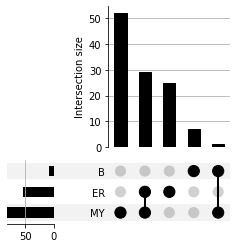

In [8]:
analyzer.plot_upset(save_name='./images/upset_plot.png')

In [9]:
analyzer.calc_percentage_overlap()

,B,ER,MY
B,88.888889,0.000000,0.892857
ER,0.000000,65.060241,25.892857
MY,11.111111,34.939759,73.214286


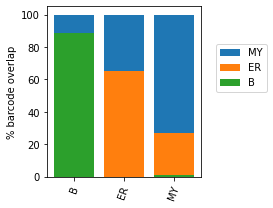

In [10]:
analyzer.plot_stacked(fig_size=(4,3), save_name='./images/stacked_plot.png')

In [11]:
analyzer.calc_overlap(corrected=True)

,B,ER,MY
B,1.000000,0.000000,0.011236
ER,0.000000,1.000000,0.271028
MY,0.011236,0.271028,1.000000


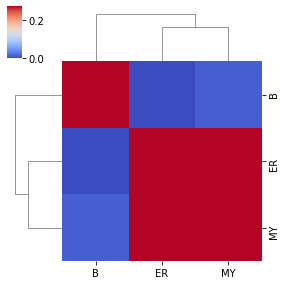

In [12]:
analyzer.plot_overlap_heatmap(fig_size=(4,4), save_name='./images/overlap_heatmap.png')

In [13]:
analyzer.calc_weighted_overlap()

,B,ER,MY
B,1.000000,0.000000,0.130218
ER,0.000000,1.000000,0.594077
MY,0.130218,0.594077,1.000000


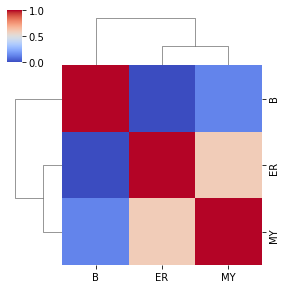

In [14]:
analyzer.plot_weighted_heatmap(fig_size=(4,4), save_name='./images/weighted_heatmap.png')